# Task 1: Univariate and Bivariate Exploratory Data Analysis (EDA)
# Univariate Analysis

       Electric Range      Base MSRP     Model Year
count   112634.000000  112634.000000  112634.000000
mean        87.812987    1793.439681    2019.003365
std        102.334216   10783.753486       2.892364
min          0.000000       0.000000    1997.000000
25%          0.000000       0.000000    2017.000000
50%         32.000000       0.000000    2020.000000
75%        208.000000       0.000000    2022.000000
max        337.000000  845000.000000    2023.000000


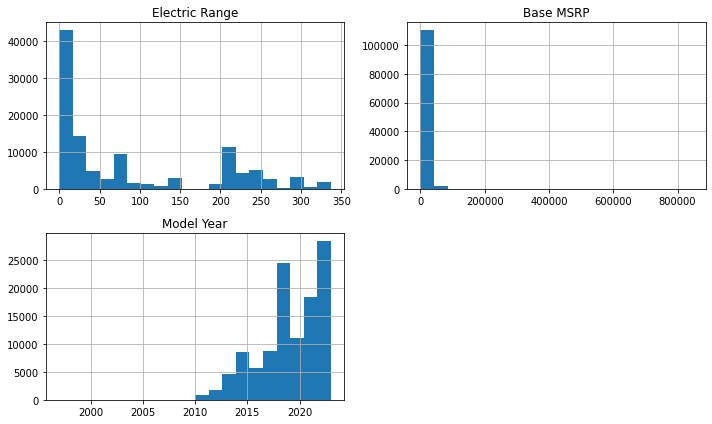

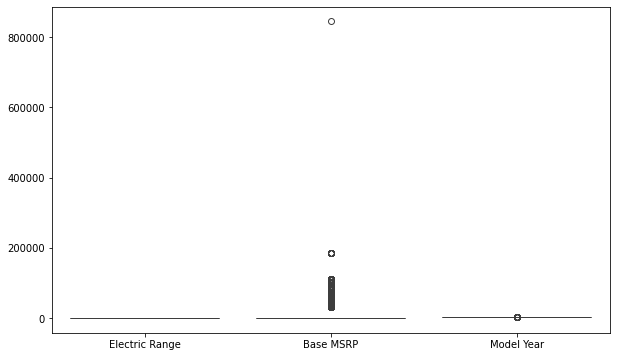

Make
TESLA             52078
NISSAN            12880
CHEVROLET         10182
FORD               5819
BMW                4680
KIA                4483
TOYOTA             4405
VOLKSWAGEN         2514
AUDI               2332
VOLVO              2288
CHRYSLER           1794
HYUNDAI            1412
JEEP               1152
RIVIAN              885
FIAT                822
PORSCHE             818
HONDA               792
MINI                632
MITSUBISHI          588
POLESTAR            558
MERCEDES-BENZ       506
SMART               273
JAGUAR              219
LINCOLN             168
CADILLAC            108
LUCID MOTORS         65
SUBARU               59
LAND ROVER           38
LEXUS                33
FISKER               20
GENESIS              18
AZURE DYNAMICS        7
TH!NK                 3
BENTLEY               3
Name: count, dtype: int64
Electric Vehicle Type
Battery Electric Vehicle (BEV)            86044
Plug-in Hybrid Electric Vehicle (PHEV)    26590
Name: count, dtype: int64
State
WA 

C:\Users\ssuun\AppData\Local\Temp\ipykernel_2896\1863172350.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




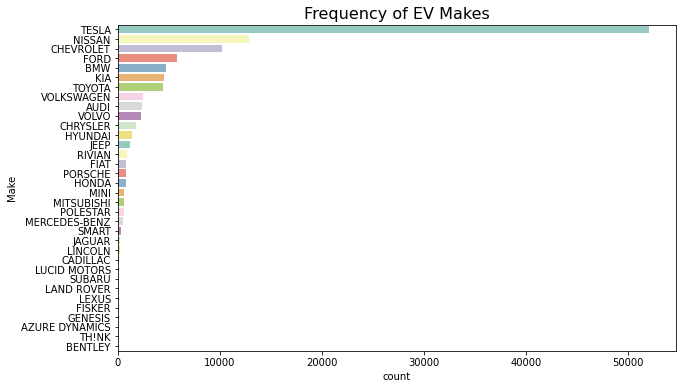

In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/projects/Exploratory Data Analysis on Electric-Vehicle/Electric Vehicles dataset.csv")
# 1.1 Numerical columns (Electric Range, Base MSRP, Model Year)
print(df[['Electric Range', 'Base MSRP', 'Model Year']].describe())

# 1.2 Histograms for numerical columns
df[['Electric Range', 'Base MSRP', 'Model Year']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# 1.3 Box plot for numerical columns to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Electric Range', 'Base MSRP', 'Model Year']])
plt.show()

# 1.4 Categorical columns (Make, Electric Vehicle Type, State)
print(df['Make'].value_counts())
print(df['Electric Vehicle Type'].value_counts())
print(df['State'].value_counts())

# 1.5 Bar plot for categorical columns
plt.figure(figsize=(10, 6))

# Use a custom Seaborn color palette (or use 'Set2', 'Set3', 'husl', etc.)
palette = sns.color_palette("Set3", n_colors=len(df['Make'].unique()))
sns.countplot(y='Make', data=df, order=df['Make'].value_counts().index, palette=palette)
plt.title("Frequency of EV Makes", fontsize=16)
plt.show()


# Task 1 - Bivariate Analysis

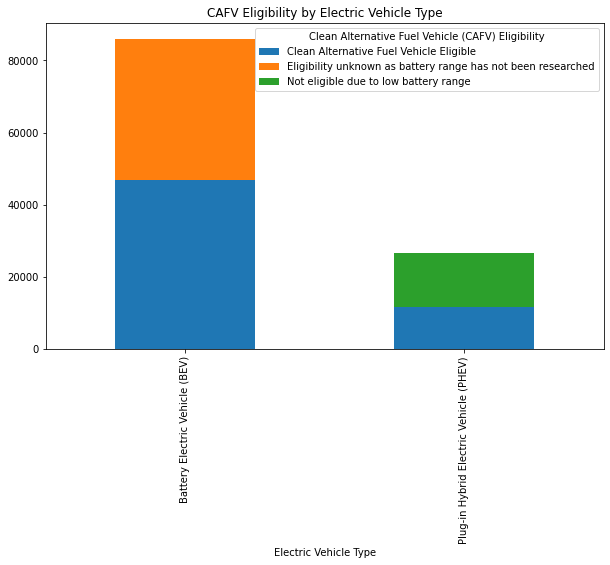

In [19]:

# 2.1 Scatter plot between Electric Range and Base MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title("Electric Range vs Base MSRP")
plt.show()

# 2.2 Correlation heatmap between numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Electric Range', 'Base MSRP', 'Model Year']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2.3 Box plot of Base MSRP by Electric Vehicle Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=df)
plt.title("Base MSRP by Electric Vehicle Type")
plt.show()

# 2.4 Stacked bar plot for Electric Vehicle Type vs CAFV Eligibility
pd.crosstab(df['Electric Vehicle Type'], df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("CAFV Eligibility by Electric Vehicle Type")
plt.show()


# Task 2 - Choropleth by State

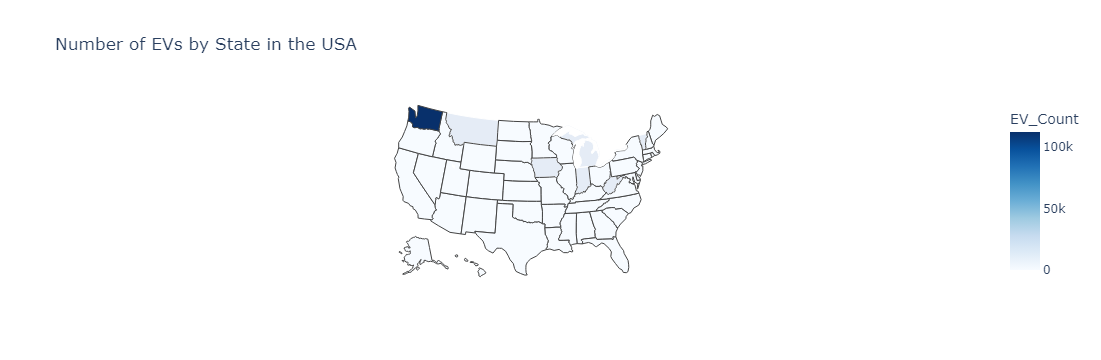

In [32]:
import plotly.express as px

# Task 2 - Choropleth by State

# Aggregate data by State
ev_counts_by_state = df.groupby('State')['VIN (1-10)'].count().reset_index()
ev_counts_by_state.columns = ['State', 'EV_Count']

# Create Choropleth
fig = px.choropleth(ev_counts_by_state,
                    locations='State',
                    locationmode='USA-states',
                    color='EV_Count',
                    scope="usa",
                    color_continuous_scale='Blues',
                    title='Number of EVs by State in the USA')

fig.show()


# Task 3 - Enhanced Racing Bar Plot for EV Make and Year

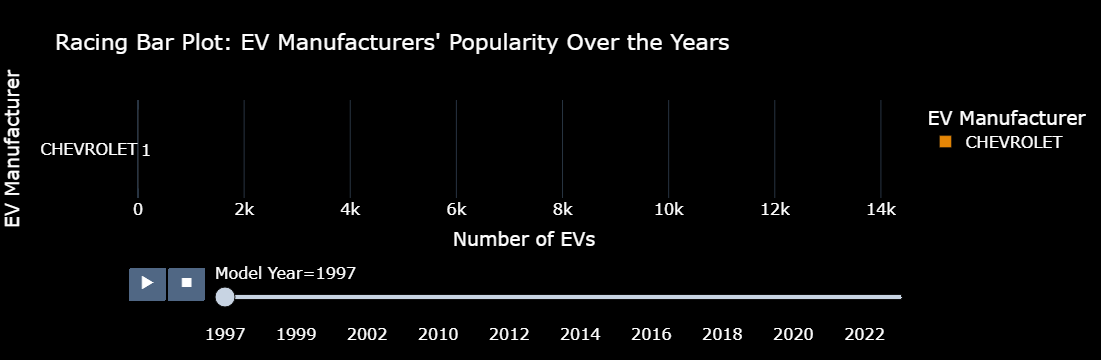

In [33]:
import plotly.express as px

# Aggregate data by Make and Model Year
ev_make_by_year = df.groupby(['Model Year', 'Make'])['VIN (1-10)'].count().reset_index()
ev_make_by_year.columns = ['Model Year', 'Make', 'Count']

# Sort the data by year and count for better animation flow
ev_make_by_year = ev_make_by_year.sort_values(by=['Model Year', 'Count'], ascending=[True, False])

# Use a larger color palette for more variety and vibrance
colors = px.colors.qualitative.Vivid + px.colors.qualitative.Pastel + px.colors.qualitative.Bold

# Create Racing Bar Plot with enhancements
fig = px.bar(ev_make_by_year, 
             x='Count', y='Make', 
             animation_frame='Model Year', 
             color='Make', 
             hover_name='Make', 
             range_x=[0, ev_make_by_year['Count'].max()],
             labels={'Count':'Number of EVs', 'Make':'EV Manufacturer'},
             title="Racing Bar Plot: EV Manufacturers' Popularity Over the Years",
             template='plotly_dark', 
             color_discrete_sequence=colors) 

# Customizing animation settings for smoother transitions
fig.update_layout(
    xaxis_title='Number of EVs',
    yaxis_title='EV Manufacturer',
    uniformtext_minsize=8, 
    uniformtext_mode='hide', 
    transition={'duration': 800},
    font=dict(size=16, color="white"),
    plot_bgcolor='black', 
    paper_bgcolor='black'
)

# Adjust bar mode and orientation for visual appeal
fig.update_traces(texttemplate='%{x}', textposition='outside')
fig.show()


# Electric Vehicles Dashboard

In [34]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

# Load dataset
df = pd.read_csv("D:/projects/Exploratory Data Analysis on Electric-Vehicle/Electric Vehicles dataset.csv")
# Dash app setup
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])

# Task 1: Univariate and Bivariate Analysis (Enhanced with more colors)
def univariate_bivariate_plots():
    # Histogram for Electric Range (vivid colors)
    fig_hist = px.histogram(df, 
                            x='Electric Range', 
                            nbins=20, 
                            title="Distribution of Electric Range",
                            color_discrete_sequence=px.colors.qualitative.Set1) 
    
    # Box plot for Base MSRP by Make (pastel colors)
    fig_box = px.box(df, 
                     x='Make', 
                     y='Base MSRP', 
                     title="Base MSRP by Make", 
                     template='plotly_dark',
                     color_discrete_sequence=px.colors.qualitative.Pastel) 

    # Scatter plot for Electric Range vs Base MSRP (bold colors)
    fig_scatter = px.scatter(df, 
                             x='Electric Range', 
                             y='Base MSRP', 
                             color='Make', 
                             title="Electric Range vs Base MSRP",
                             color_discrete_sequence=px.colors.qualitative.Bold) 
    
    return dcc.Graph(figure=fig_hist), dcc.Graph(figure=fig_box), dcc.Graph(figure=fig_scatter)


# Task 2: Choropleth for EV count by state
import plotly.express as px

# Task 2 - Choropleth for EV count by state with enhanced color

def choropleth_map():
    # Aggregate data by State
    ev_counts_by_state = df.groupby('State')['VIN (1-10)'].count().reset_index()
    ev_counts_by_state.columns = ['State', 'EV_Count']
    
    # Create Choropleth using a more colorful scale (Turbo)
    fig_choropleth = px.choropleth(ev_counts_by_state,
                                   locations='State',
                                   locationmode='USA-states',
                                   color='EV_Count',
                                   scope="usa",
                                   color_continuous_scale='Turbo', 
                                   title="Number of EVs by State in the USA")
    
    # Customize layout for aesthetics
    fig_choropleth.update_layout(
        geo=dict(bgcolor='rgba(0,0,0,0)'),  
        paper_bgcolor='black', 
        font=dict(color="white"), 
        margin={"r":0,"t":50,"l":0,"b":0}
    )

    return dcc.Graph(figure=fig_choropleth)



# Task 3: Racing Bar Plot for EV Make and Year
def racing_bar_plot():
    ev_make_by_year = df.groupby(['Model Year', 'Make'])['VIN (1-10)'].count().reset_index()
    ev_make_by_year.columns = ['Model Year', 'Make', 'Count']
    ev_make_by_year = ev_make_by_year.sort_values(by=['Model Year', 'Count'], ascending=[True, False])
    
    colors = px.colors.qualitative.Vivid + px.colors.qualitative.Pastel + px.colors.qualitative.Bold
    
    fig_race = px.bar(ev_make_by_year, 
                      x='Count', y='Make', 
                      animation_frame='Model Year', 
                      color='Make', 
                      hover_name='Make', 
                      range_x=[0, ev_make_by_year['Count'].max()],
                      labels={'Count':'Number of EVs', 'Make':'EV Manufacturer'},
                      title="Racing Bar Plot: EV Manufacturers' Popularity Over the Years",
                      template='plotly_dark', 
                      color_discrete_sequence=colors)
    
    return dcc.Graph(figure=fig_race)

# App Layout
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Electric Vehicles Dashboard", className='text-center text-primary mb-4'), width=12)
    ]),
    dbc.Row([
        dbc.Col(html.H3("Task 1: Exploratory Data Analysis (EDA)", className='text-white'), width=12),
        dbc.Col(univariate_bivariate_plots(), width=12)
    ], className="mb-5"),
    dbc.Row([
        dbc.Col(html.H3("Task 2: Choropleth Map", className='text-white'), width=12),
        dbc.Col(choropleth_map(), width=12)
    ], className="mb-5"),
    dbc.Row([
        dbc.Col(html.H3("Task 3: Racing Bar Plot", className='text-white'), width=12),
        dbc.Col(racing_bar_plot(), width=12)
    ])
], fluid=True)


if __name__ == '__main__':
    app.run_server(debug=True)
